In [2]:
import numpy as np
import pandas as pd
import requests
import json



from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
# !pip install xgboost
# !pip install fasttext
import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
# import fasttext
# import fasttext.util
# from transformers import AutoTokenizer, TFAutoModel

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

import joblib
from sklearn import preprocessing
# pd.set_option('display.max_rows', None)
# # pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

!pip install joblib
import joblib

**trainDF for 5 other classifiers**

In [ ]:
df  = pd.read_csv("my_csv3.csv")
df.columns=["inex",'chat_id', 'last_pages', 'threads_count', 'tags', 'score', 'userid', 'chat', 'raw_text','label']

# create a dataframe using texts and lables
trainDF = pd.DataFrame()
# trainDF['text'] = texts
# trainDF['label'] = labels
trainDF['text'] = df['raw_text']
# mlb = MultiLabelBinarizer(sparse_output=True)
trainDF['label'] = (df['label'])######################################################
# trainDF['label'] = mlb.fit_transform(df['label'])######################################################



blacklist=['📞 ثبت نام / ورود','✒ آموزش ثبت نام','📈 فروش در باسلام','📃 درباره باسلام', '📦 پیگیری سفارش', '❌هیچ کدوم']
for index, text in trainDF.iterrows():
    for black in blacklist:
        #####pre processing
        trainDF.iloc[index]['text']  = trainDF.iloc[index]['text'].replace(black," ")
    trainDF.iloc[index]['text']  = trainDF.iloc[index]['text'].replace('\n'," . ")
    #NORMALIZATION:

    
    
print(len(trainDF))
trainDF.dropna(subset=(['label']), inplace=True)
trainDF.drop_duplicates(subset ="text", keep = False, inplace = True)
trainDF.reset_index(drop=True, inplace=True)

for indx, row in trainDF.iterrows():
#     print(indx, row,  trainDF.iloc[indx]['label'] , type( trainDF.iloc[indx]['label'] ), "\n____")

    label = row['label']
#     print((label), type(label))
#     try:
    if type(label)==str:

        label_new =np.array(list(map(int ,label[1:-1].replace(" ","").split(","))))
    #         print(label_new, type(label_new))
        if sum(label_new[2:])<=1:
            trainDF.iloc[indx]['label'] = label_new[2:]
        else:
            trainDF.iloc[indx]['label'] = None
            
#         print(type( trainDF.iloc[indx]['label'] ),  trainDF.iloc[indx]['label'] )
#     except:
    elif type(label)==list:
        pass
    else:
        print("else",label, type(label))
        pass
trainDF.dropna(subset=(['label']), inplace=True)


print(len(trainDF))
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])
train_y = np.array(train_y)
valid_y = np.array(valid_y)
trainDF

14047
6098


,text,label
0,سلام سفارشی دادم هنوز به دستم نرسیده . شماره ...,"[0, 0, 0, 0, 1, 0, 0, 0]"
1,سلام. میخواستم از باسلام خرید کنم به مبلغ 81....,"[0, 0, 0, 0, 0, 1, 0, 0]"
2,سلام . خانوم کد رهگیری برا من نیومده . 1473-D...,"[0, 1, 0, 0, 0, 0, 0, 0]"
3,سلام یکی از اقلام سفارش من لغو شده، ولی هزینه...,"[0, 0, 0, 0, 0, 0, 1, 0]"
4,سلام من یک کتاب سفارش دادم ولی فرستند تایید ن...,"[0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...
6110,سلام . چرا اعتبار من قابل استفاده نیست . من ا...,"[0, 0, 0, 1, 0, 0, 0, 0]"
6111,سلام‌ وقت بخیر. من ۹ بار از سایت خرید کردم. ن...,"[0, 0, 0, 0, 0, 0, 1, 0]"
6112,سلام و وقت بخير . من اين همه زحمت کشيدم و در ...,"[0, 0, 0, 1, 0, 0, 0, 0]"
6113,سلام دیروز سفارش ماسک دادم پول واریز کردم ازغ...,"[0, 0, 1, 0, 0, 0, 0, 0]"


In [ ]:

# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word')#, token_pattern=r'\w{1,}')
count_vect.fit(trainDF['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

#
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word',  max_features=5000)
tfidf_vect.fit(trainDF['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDF['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(trainDF['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 



In [ ]:

#
#fasttext:


# fasttext.util.download_model('fa', if_exists='ignore')  # farsi
ft = fasttext.load_model('cc.fa.300.bin')

fastx = np.array([ft.get_sentence_vector(x) for x in list(train_x)])
fastx_valid = np.array([ft.get_sentence_vector(x) for x in list(valid_x)])



In [ ]:
classifiers =[ 
    RandomForestClassifier(n_estimators=100, random_state=1),
             naive_bayes.MultinomialNB(),
             linear_model.LogisticRegression(),
             svm.SVC(),
             ensemble.RandomForestClassifier(),
             xgboost.XGBClassifier()]

classifiers_str =[
    "RandomForestClassifier",
             "naive_bayes.MultinomialNB()",
             "linear_model.LogisticRegression()",
             "svm.SVC()",
             "ensemble.RandomForestClassifier()",
             "xgboost.XGBClassifier()"]



# features =[xtrain_count, xtrain_tfidf, xtrain_tfidf_ngram, xtrain_tfidf_ngram_chars,fastx,bertx,bertx]
# features_str =["xtrain_count", 'xtrain_tfidf', "xtrain_tfidf_ngram", "xtrain_tfidf_ngram_chars",'fasttext','parsbert']
# features_val =[xvalid_count, xvalid_tfidf, xvalid_tfidf_ngram, xvalid_tfidf_ngram_chars,fastx_valid,bertx_valid]



features =[xtrain_count, xtrain_tfidf, xtrain_tfidf_ngram, xtrain_tfidf_ngram_chars]
features_str =["xtrain_count", 'xtrain_tfidf', "xtrain_tfidf_ngram", "xtrain_tfidf_ngram_chars"]
features_val =[xvalid_count, xvalid_tfidf, xvalid_tfidf_ngram, xvalid_tfidf_ngram_chars]


for f in features:
    print(f.shape)



# for feature in features:
#     print(feature.shape)
# (36, 970)
# (36, 970)
# (36, 4718)
# (36, 3677)

models = []


for i in range(len(classifiers)):

    for j in range(len(features)):
        
        try:

            #         forest = RandomForestClassifier(n_estimators=100, random_state=1)
            multi_target = MultiOutputClassifier(classifiers[i], n_jobs=-1)
            model = multi_target.fit(features[j], numpy.stack( train_y, axis=0 ))
            pred = model.predict(features_val[j])
            models.append(model)
            # all_labels = mlb.inverse_transform(pred)


            result = metrics.accuracy_score(pred, numpy.stack( valid_y, axis=0 ))
            print((classifiers_str[i]) , " ----->",(features_str[j]), "---->", result)

        except:
            pass
    print("_________________________")
        


NameError: name 'xtrain_count' is not defined

**test of classifiers**

In [ ]:

def featuretest(test_x):
    
  
    # transform the training and validation data using count vectorizer object
    xtestcount =  count_vect.transform(test_x)

    # word level tf-idf
    xtest_tfidf =  tfidf_vect.transform(test_x)

    # ngram level tf-idf 
    xtest_tfidf_ngram =  tfidf_vect_ngram.transform(test_x)

    # characters level tf-idf
    xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(test_x) 
    
#     fasttext
#     fastx_test = np.array([ft.get_sentence_vector(x) for x in list(test_x)])

    
    return xtestcount, xtest_tfidf, xtest_tfidf_ngram, xtest_tfidf_ngram_chars

taglist = ['مشتری', 'غرفه دار', 'درخواست کنسلی', 'بدون دیتا', 'پیگیری وضعیت سفارش', 'فراد', 'ثبت مشکل جدید', 'مالی', 'کد تخفیف', 'others']
taglist = taglist[2:]

def xgpred(test_x):


    # test_y =  pd.Series([[1,0,0,0,0,0,0,0],
    #                   [0,0,0,0,1,0,0,0]])


    # testdf = pd.DataFrame(data={'text':test_x, 'label':test_y})

    # testdf['text'] = list(test_x)
    # testdf['label'] = (test_y)

    # text_x = testdf['text']
    # test_y = testdf['label']

    # testdf, test_x

    #get features
    f1,f2,f3,f4 = featuretest(test_x)

    featurss =[f1,f2,f3,f4]
    featurestr = [ 'count', 'tfidf', 'tfidf_ngram', 'tfidf_ngram_chars']
    resdf = pd.DataFrame(columns=["text"]+featurestr)
    resdf['text']= test_x

    #feature and model(trained on that feature):
    res =[]
    for i in range(4):

        model = models[-i]
        f = featurss[i]
        result = model.predict(f)

        rlist=[]
        for r in result:
            index = numpy.where(r==1)
            if len(index[0]):
                rlist.append(taglist[index[0][0]])
            else:
                rlist.append('not detected')
        resdf[featurestr[i]] = rlist
    return resdf
    
    
test_x = pd.Series( ["سلام میخوام این سفارشو لغو کنم اصلا راضی نیستم",
                         " میخوام پس بدم   کنسل کنید راضی نیستم این سفارش مشکل داره مثل عکسش نیست"])

xgpred(test_x)

,text,count,tfidf,tfidf_ngram,tfidf_ngram_chars
0,سلام میخوام این سفارشو لغو کنم اصلا راضی نیستم,درخواست کنسلی,بدون دیتا,درخواست کنسلی,بدون دیتا
1,میخوام پس بدم کنسل کنید راضی نیستم این سفار...,درخواست کنسلی,بدون دیتا,درخواست کنسلی,بدون دیتا


**fast text classification**

In [ ]:
# df  = pd.read_csv("my_csv3.csv")
# df.columns=["inex",'chat_id', 'last_pages', 'threads_count', 'tags', 'score', 'userid', 'chat', 'raw_text','label']

# print("len df", len(df))
# # create a dataframe using texts and lables
# trainDF = pd.DataFrame()
# # trainDF['text'] = texts
# # trainDF['label'] = labels
# trainDF['text'] = df['raw_text']
# # mlb = MultiLabelBinarizer(sparse_output=True)
# trainDF['label'] = (df['tags'])######################################################
# # trainDF['label'] = mlb.fit_transform(df['label'])######################################################



# blacklist=['📞 ثبت نام / ورود','✒ آموزش ثبت نام','📈 فروش در باسلام','📃 درباره باسلام', '📦 پیگیری سفارش', '❌هیچ کدوم']
# for index, text in trainDF.iterrows():
#     for black in blacklist:
#         #####pre processing
#         trainDF.iloc[index]['text'] = trainDF.iloc[index]['text'].replace(black," ")
   
# trainDF.dropna(subset=(['label']), inplace=True)
# trainDF.drop_duplicates(subset ="tex    t", keep = False, inplace = True)
# trainDF.reset_index(drop=True, inplace=True)

# # split the dataset into training and validation datasets 
# train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])
# train_y = np.array(train_y)
# valid_y = np.array(valid_y)
# trainDF

In [ ]:
train =[]
for i in range(len(list(train_x))):
    row = '__label__'+str(train_y[i]).replace(" ","_")+" "
    row += list(train_x)[i]
    train.append(row)

    

with open('fasttrain.txt', 'w',encoding='utf-8') as f:
    for item in train:
        f.write(str(item)+"\n")



model = fasttext.train_supervised(input='fasttrain.txt', lr=0.5, epoch=50, wordNgrams=3, bucket=200000, dim=200)#, loss='ova')
model.save_model("./DB/model_fast.bin")
model.predict('2898005 بله ممنون الان میگم خدمتتون من بگه قابل دسترسی نیست؟ به خود غرفه دار هم پیغام دادم و ')#,k=-1, threshold=0.1)
#model.test("file.valid") #number , precision ,recall 
model

In [ ]:
model.predict('من اینو نمیخوام میشه پس بگیرید؟ شماره سفارشم اینه م و ', k=3)#,k=-1, threshold=0.1)
r = model.predict('این خرابه و مثل شکلش نیست میخوام پس بدم ', k=3)#,k=-1, threshold=0.1)
#model.test("file.valid") #number , precision ,recall
# for label, score in r:
#     print(label,score)
# print(r)

def show_result(r):
    pred = []
    for i in range(len(r[0])):
        result = list( map(int,(r[0][i][10:-1].replace("_"," ")).split(" ")))
        try:
            result = taglist[result.index(1)]
        except:
            result = "others"

        pred.append({result:r[1][i]})

    return pred
    

In [ ]:
model = fasttext.load_model("./DB/model_fast.bin")

In [ ]:
taglist

['درخواست کنسلی',
 'بدون دیتا',
 'پیگیری وضعیت سفارش',
 'فراد',
 'ثبت مشکل جدید',
 'مالی',
 'کد تخفیف',
 'others']

In [ ]:
result = model.predict('2898005 من این گلاب ها رو نمیخوام اصلا راضی نیستم خراب شدن  شماره سفارشم اینه به غرفه دار هم گفتم  ')#, k=3)
result = model.predict('این کد تخفیفی که به من داید کار نمیکنه برای دیروز هست  ')
show_result(result)

[{'کد تخفیف': 0.99988853931427}]

In [ ]:
test = ["2898005 من این گلاب ها رو نمیخوام اصلا راضی نیستم خراب شدن  شماره سفارشم اینه به غرفه دار هم گفتم",
       "2898005می خوام کنسل کنم. غرفه دار گفت نداره ه دار هم گفتم ",
       " این کد تخفیفی که به من داید کار نمیکنه برای دیروز هست"]


xgpred(test)

,text,count,tfidf,tfidf_ngram,tfidf_ngram_chars
0,2898005 من این گلاب ها رو نمیخوام اصلا راضی نی...,not detected,بدون دیتا,not detected,بدون دیتا
1,2898005می خوام کنسل کنم. غرفه دار گفت نداره ه ...,درخواست کنسلی,بدون دیتا,درخواست کنسلی,بدون دیتا
2,این کد تخفیفی که به من داید کار نمیکنه برای د...,not detected,بدون دیتا,کد تخفیف,not detected


In [ ]:
len(['user_id','count_purchase','avg_off_purchas','max_off_purchase','stddev_off_purchase', 'avg_stars','num_stars','num_comments',
'avg_comments', 'recency','frequency','monetary','gmv','recency_score','frequency_score','monetory_score','count_chats', 'avg_off_chat',
'max_off_chat','stdev_off_chat','user_order_count',  'user_follower_count',  'user_following_count','last_engaged_with_review',
'creation_tags', 'last_activity', 'wishlist', 'last_wishlist','label'])

29

In [ ]:
# profiling

In [ ]:
# df = pd.read_csv('profile2.csv')
# df = pd.read_csv('profile_v2.csv')
# df = pd.read_csv('profile_v3.csv')
df = pd.read_csv('/content/drive/MyDrive/basalam/regression_v2.csv')
df=df.fillna(0)
# df.columns =['user_id','count_purchase','avg_off_purchas','max_off_purchase','stddev_off_purchase', 'avg_stars','num_stars','num_comments',
# 'avg_comments', 'recency','frequency','monetary','gmv','recency_score','frequence_score','monetory_score','count_chats', 'avg_off_chat',
# 'max_off_chat','stdev_off_chat','label']

df.columns =['user_id','count_purchase','avg_off_purchas','max_off_purchase','stddev_off_purchase', 'avg_stars','num_stars','num_comments',
'avg_comments', 'recency','frequency','monetary','gmv','recency_score','frequency_score','monetory_score','count_chats', 'avg_off_chat',
'max_off_chat','stdev_off_chat','user_order_count',  'user_follower_count',  'user_following_count','last_engaged_with_review',
'creation_tags', 'last_activity', 'wishlist', 'last_wishlist','glabel','label']




apps =[]
clients =[]
os =[]
devices =[]
for ind,row in df.iterrows():
    try:
        re = [tag.split(":")[1] for tag in row['creation_tags'][1:-1].split(',')[:4]]
        apps.append(re[0])
        clients.append(re[1])
        os.append(re[2])
        devices.append(re[3])
        
    except:
        apps.append("-")
        clients.append("-")
        os.append("-")
        devices.append("-")
        
        
        
        
df['app'] = apps
df['client'] =  clients
df['os'] = os
df['device'] = devices


x = df
x = x.drop(columns=['label'])
x = x.drop(columns=['glabel'])
x = x.drop(columns=['creation_tags'])
x = x.drop(columns=['user_id'])
le = preprocessing.LabelEncoder()
x['app'] = le.fit_transform(x['app'])
x['client'] = le.fit_transform(x['client'])
x['os'] = le.fit_transform(x['os'])
x['device'] = le.fit_transform(x['device'])
# x['client_version'] = le.fit_transform(x['client_version'])
# x['android_version'] = le.fit_transform(x['android_version'])

y = df['glabel']
x = x.fillna(0)
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x, y)
train_x

multi_target = RandomForestClassifier(n_estimators=100, random_state=1)
model = multi_target.fit(train_x, numpy.stack( train_y, axis=0 ))
pred = model.predict(valid_x)
result = metrics.accuracy_score(pred, numpy.stack( valid_y, axis=0 ))
print("---->", result)
# joblib.dump(model, 'purchase_regression_model')


In [1]:
df

NameError: ignored

In [ ]:

y = df['label']
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x, y)


pred2 = m.predict(valid_x)
result2 = metrics.accuracy_score(pred, numpy.stack( valid_y, axis=0 ))
print("---->", result2)

y_pred = pred 
y_test = valid_y
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
model_results = pd.DataFrame([[classifiers_str[i], acc, prec, rec, f1]],
columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score'])
results = pd.DataFrame()
results = results.append(model_results, ignore_index = True)
#
# joblib.dump(model, 'purchase_regression_model')


In [4]:
# df = pd.read_csv('profile2.csv')
# df = pd.read_csv('profile_v2.csv')
# df = pd.read_csv('profile_v3.csv')
df = pd.read_csv('/content/drive/MyDrive/basalam/regression.csv')
df=df.fillna(0)
# df.columns =['user_id','count_purchase','avg_off_purchas','max_off_purchase','stddev_off_purchase', 'avg_stars','num_stars','num_comments',
# 'avg_comments', 'recency','frequency','monetary','gmv','recency_score','frequence_score','monetory_score','count_chats', 'avg_off_chat',
# 'max_off_chat','stdev_off_chat','label']

df.columns =['user_id','count_purchase','avg_off_purchas','max_off_purchase','stddev_off_purchase', 'avg_stars','num_stars','num_comments',
'avg_comments', 'recency','frequency','monetary','gmv','recency_score','frequency_score','monetory_score','count_chats', 'avg_off_chat',
'max_off_chat','stdev_off_chat','user_order_count',  'user_follower_count',  'user_following_count','last_engaged_with_review',
'creation_tags', 'last_activity', 'wishlist', 'last_wishlist','label']
df

,user_id,count_purchase,avg_off_purchas,max_off_purchase,stddev_off_purchase,avg_stars,num_stars,num_comments,avg_comments,recency,frequency,monetary,gmv,recency_score,frequency_score,monetory_score,count_chats,avg_off_chat,max_off_chat,stdev_off_chat,user_order_count,user_follower_count,user_following_count,last_engaged_with_review,creation_tags,last_activity,wishlist,last_wishlist,label
0,999,1,0,0,0,0.0,0.0,0.0,0.0,12.0,1.0,3939200.0,4949000.0,1.0,1.0,4.0,3.0,0.0,0.0,0.0,17.0,127,3,17,0,15,7,26,0
1,1111,1,0,0,0,0.0,0.0,0.0,0.0,16.0,1.0,2930300.0,11662000.0,2.0,1.0,4.0,3.0,0.0,0.0,0.0,148.0,4061,427,1,0,12,5,2,0
2,1172,1,0,0,0,0.0,0.0,0.0,0.0,37.0,1.0,458000.0,650000.0,4.0,1.0,2.0,4.0,0.0,0.0,0.0,2.0,8,8,0,0,11,16,28,0
3,1307,1,0,0,0,0.0,0.0,0.0,0.0,9.0,1.0,770000.0,1070000.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,1.0,0,1,0,0,6,0,0,0
4,1813,1,0,0,0,0.0,0.0,0.0,0.0,21.0,1.0,0.0,1776000.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,44.0,1073,52,2,0,17,26,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152316,3074249,1,0,0,0,0.0,0.0,0.0,0.0,7.0,1.0,100000.0,100000.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,3,0,0,"{app:mobile,client:customer,os:android,device:...",2,0,0,0
152317,3074274,1,0,0,0,0.0,0.0,0.0,0.0,7.0,1.0,259000.0,559000.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1,0,0,"{app:mobile,client:customer,os:android,device:...",6,0,0,0
152318,3074320,1,0,0,0,0.0,0.0,0.0,0.0,7.0,1.0,200000.0,500000.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0,5,"{app:web,client:customer,os:android,device:mob...",5,0,0,0
152319,3074369,1,0,0,0,0.0,0.0,0.0,0.0,7.0,1.0,202000.0,502000.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1,0,0,"{app:web,client:customer,os:android,device:mob...",2,0,0,0


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
print(len(df))
df.drop_duplicates(keep=False, inplace=True)
print(len(df))

152321
152321


(<matplotlib.axes._subplots.AxesSubplot at 0x7f20ee720090>,
 '---->',
 8.0,
 '% of users ')

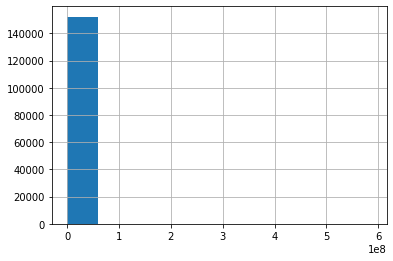

In [6]:
df['label'].hist(),"---->", round(len(df[df['label']!=0])/len(df),2)*100, "% of users "

In [ ]:
df2 = pd.read_csv("profile_log.csv",index_col=0)
df2=df2.fillna(0)

df2

,user_id,count_log,client,client_version,android_version,last_log
0,2723388,14,['web'],['1.0.0'],[''],13
1,176160,6,['web'],['1.0.0'],[''],17
2,1170522,16,['web'],['1.0.0'],[''],21
3,2855536,7,['web'],['1.0.0'],[''],25
4,2772801,31,['web'],['1.0.0'],[''],15
...,...,...,...,...,...,...
447949,2950641,24,['web'],['1.0.0'],[''],14
447950,1206739,7,['web'],['1.0.0'],[''],16
447951,2958956,4,['web'],['1.0.0'],[''],15
447952,352914,13,['web'],['1.0.0'],[''],8


In [ ]:
# df2.at[0,'client'] = df2.at[2,'client'][0]
(df2.at[2,'client'])[0]

'['

In [ ]:
for ind, row in df2.iterrows():
    df2.at[ind,'']

In [ ]:
df = pd.merge(df, df2, how='left', on=['user_id'])
df

,user_id,count_purchase,avg_off_purchas,max_off_purchase,stddev_off_purchase,avg_stars,num_stars,num_comments,avg_comments,recency,...,creation_tags,last_activity,wishlist,last_wishlist,label,count_log,client,client_version,android_version,last_log
0,2275,9,1,9,3,4.8,9,7,0.8,11,...,0,18,612,6,0,231.0,['web'],['1.0.0'],[''],8.0
1,5566,1,0,0,0,5.0,1,0,0.0,24,...,0,11,4,31,0,40.0,['web'],['1.0.0'],[''],6.0
2,7261,4,4,7,4,5.0,3,2,0.7,10,...,0,29,21,29,0,509.0,['web'],['1.0.0'],[''],7.0
3,7276,1,0,0,0,4.7,3,3,1.0,37,...,0,27,33,7,0,14.0,['web'],['1.0.0'],[''],14.0
4,7332,2,6,12,8,5.0,1,1,1.0,21,...,0,16,36,26,0,28.0,['web'],['1.0.0'],[''],7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56919,3050257,1,0,0,0,5.0,1,0,0.0,7,...,"{app:web,client:customer,os:linux,device:deskt...",31,1,8,1,32.0,['web'],['1.0.0'],[''],6.0
56920,3051223,1,0,0,0,5.0,2,1,0.5,7,...,"{app:web,client:customer,os:android,device:mob...",31,0,0,0,11.0,['web'],['1.0.0'],[''],7.0
56921,3051407,1,0,0,0,5.0,1,1,1.0,7,...,"{app:web,client:customer,os:android,device:mob...",31,0,0,0,20.0,['web'],['1.0.0'],[''],7.0
56922,3051576,1,0,0,0,5.0,1,0,0.0,7,...,"{app:web,client:customer,os:android,device:mob...",31,0,0,0,48.0,['web'],['1.0.0'],[''],7.0


In [7]:
# df.at[15088,'creation_tags'][1:-1].split(',')[:4]

apps =[]
clients =[]
os =[]
devices =[]
for ind,row in df.iterrows():
    try:
        re = [tag.split(":")[1] for tag in row['creation_tags'][1:-1].split(',')[:4]]
        apps.append(re[0])
        clients.append(re[1])
        os.append(re[2])
        devices.append(re[3])
        
    except:
        apps.append("-")
        clients.append("-")
        os.append("-")
        devices.append("-")
        
        

# df.at[0,'creation_tags'][1:-1].split(',')[:4]
# len(df[df['creation_tags']==0]) 5K

In [8]:
df['app'] = apps
df['client'] =  clients
df['os'] = os
df['device'] = devices

In [9]:
df

,user_id,count_purchase,avg_off_purchas,max_off_purchase,stddev_off_purchase,avg_stars,num_stars,num_comments,avg_comments,recency,frequency,monetary,gmv,recency_score,frequency_score,monetory_score,count_chats,avg_off_chat,max_off_chat,stdev_off_chat,user_order_count,user_follower_count,user_following_count,last_engaged_with_review,creation_tags,last_activity,wishlist,last_wishlist,label,app,client,os,device
0,999,1,0,0,0,0.0,0.0,0.0,0.0,12.0,1.0,3939200.0,4949000.0,1.0,1.0,4.0,3.0,0.0,0.0,0.0,17.0,127,3,17,0,15,7,26,0,-,-,-,-
1,1111,1,0,0,0,0.0,0.0,0.0,0.0,16.0,1.0,2930300.0,11662000.0,2.0,1.0,4.0,3.0,0.0,0.0,0.0,148.0,4061,427,1,0,12,5,2,0,-,-,-,-
2,1172,1,0,0,0,0.0,0.0,0.0,0.0,37.0,1.0,458000.0,650000.0,4.0,1.0,2.0,4.0,0.0,0.0,0.0,2.0,8,8,0,0,11,16,28,0,-,-,-,-
3,1307,1,0,0,0,0.0,0.0,0.0,0.0,9.0,1.0,770000.0,1070000.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,1.0,0,1,0,0,6,0,0,0,-,-,-,-
4,1813,1,0,0,0,0.0,0.0,0.0,0.0,21.0,1.0,0.0,1776000.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,44.0,1073,52,2,0,17,26,8,0,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152316,3074249,1,0,0,0,0.0,0.0,0.0,0.0,7.0,1.0,100000.0,100000.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,3,0,0,"{app:mobile,client:customer,os:android,device:...",2,0,0,0,mobile,customer,android,mobile
152317,3074274,1,0,0,0,0.0,0.0,0.0,0.0,7.0,1.0,259000.0,559000.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1,0,0,"{app:mobile,client:customer,os:android,device:...",6,0,0,0,mobile,customer,android,mobile
152318,3074320,1,0,0,0,0.0,0.0,0.0,0.0,7.0,1.0,200000.0,500000.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0,5,"{app:web,client:customer,os:android,device:mob...",5,0,0,0,web,customer,android,mobile
152319,3074369,1,0,0,0,0.0,0.0,0.0,0.0,7.0,1.0,202000.0,502000.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1,0,0,"{app:web,client:customer,os:android,device:mob...",2,0,0,0,web,customer,android,mobile


In [10]:
x = df
x = x.drop(columns=['label'])
x = x.drop(columns=['creation_tags'])
x = x.drop(columns=['user_id'])
le = preprocessing.LabelEncoder()
x['app'] = le.fit_transform(x['app'])
x['client'] = le.fit_transform(x['client'])
x['os'] = le.fit_transform(x['os'])
x['device'] = le.fit_transform(x['device'])
# x['client_version'] = le.fit_transform(x['client_version'])
# x['android_version'] = le.fit_transform(x['android_version'])

y = df['label']
x = x.fillna(0)
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x, y)
train_x

,count_purchase,avg_off_purchas,max_off_purchase,stddev_off_purchase,avg_stars,num_stars,num_comments,avg_comments,recency,frequency,monetary,gmv,recency_score,frequency_score,monetory_score,count_chats,avg_off_chat,max_off_chat,stdev_off_chat,user_order_count,user_follower_count,user_following_count,last_engaged_with_review,last_activity,wishlist,last_wishlist,app,client,os,device
48808,8,3,10,3,5.0,5.0,1.0,0.2,10.0,8.0,9931100.0,11048000.0,1.0,4.0,4.0,7.0,0.7,4.0,1.5,17.0,2,2,26,13,11,9,2,2,1,4
64390,1,0,0,0,0.0,0.0,0.0,0.0,26.0,1.0,0.0,255000.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3,0,0,17,0,0,4,2,1,4
29997,1,0,0,0,0.0,0.0,0.0,0.0,21.0,1.0,300000.0,600000.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,3,0,0,20,1,20,2,2,1,4
143983,1,0,0,0,0.0,0.0,0.0,0.0,21.0,1.0,204000.0,504000.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0,0,19,0,0,2,2,1,4
111474,1,0,0,0,5.0,1.0,0.0,0.0,12.0,1.0,250000.0,550000.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0,28,28,0,0,2,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99740,1,0,0,0,0.0,0.0,0.0,0.0,29.0,1.0,319000.0,619000.0,3.0,1.0,2.0,6.0,0.0,0.0,0.0,1.0,1,0,0,11,0,0,4,2,1,4
31103,1,0,0,0,5.0,2.0,0.0,0.0,19.0,1.0,390000.0,840000.0,2.0,1.0,2.0,22.0,0.2,4.0,0.9,1.0,5,1,27,27,0,0,4,2,1,4
133375,1,0,0,0,5.0,1.0,1.0,1.0,35.0,1.0,200000.0,650000.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0,6,5,0,0,4,2,1,4
128186,1,0,0,0,0.0,0.0,0.0,0.0,27.0,1.0,20000.0,520000.0,3.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0,1,0,15,0,0,4,2,1,4


In [ ]:
print(type(train_x.loc[52427]['last_log']))

<class 'numpy.float64'>


In [ ]:
# x = df
# x = x.drop(columns=['label'])
# x = x.drop(columns=['creation_tags'])
# x = x.drop(columns=['user_id'])
# le = preprocessing.LabelEncoder()
# x['app'] = le.fit_transform(x['app'])
# x['client'] = le.fit_transform(x['client'])
# x['os'] = le.fit_transform(x['os'])
# x['device'] = le.fit_transform(x['device'])

# y = df['label']

# train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x, y)
# train_x

In [ ]:
# x = df
# x = x.drop(columns=['label'])
# x = x.drop(columns=['creation_tags'])
# x = x.drop(columns=['user_id'])
# le = preprocessing.LabelEncoder()
# x['app'] = le.fit_transform(x['app'])
# x['client'] = le.fit_transform(x['client'])
# x['os'] = le.fit_transform(x['os'])
# x['device'] = le.fit_transform(x['device'])

# y = df['label']

# train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x, y)
# train_x

In [11]:
a = [train_x, valid_x, train_y, valid_y]
for i in a:
    print(i.shape)

(114240, 30)
(38081, 30)
(114240,)
(38081,)


In [12]:
classifiers =[ 
#     RandomForestClassifier(n_estimators=100, random_state=1),
#              naive_bayes.MultinomialNB(),
             linear_model.LogisticRegression(),
#              svm.SVC(),
#              xgboost.XGBClassifier()
]

classifiers_str =[
#     "RandomForest",
#              "naive_bayes",
             "LogisticRegression",
#              "svm",
#              "xgboost"
]

models = []
results = pd.DataFrame()

# train_x, valid_x, train_y, valid_y

for i in range(len(classifiers)):

#     for j in range(len(features)):

    try:

        #         forest = RandomForestClassifier(n_estimators=100, random_state=1)
        multi_target = (classifiers[i])
        model = multi_target.fit(train_x, numpy.stack( train_y, axis=0 ))
        pred = model.predict(valid_x)
        models.append(model)
        # all_labels = mlb.inverse_transform(pred)


        result = metrics.accuracy_score(pred, numpy.stack( valid_y, axis=0 ))
        print((classifiers_str[i]) , " ----->", "---->", result)


        y_pred = pred 
        y_test = valid_y
        acc = accuracy_score(y_test, y_pred )
        prec = precision_score(y_test, y_pred )
        rec = recall_score(y_test, y_pred )
        f1 = f1_score(y_test, y_pred )
        model_results = pd.DataFrame([[classifiers_str[i], acc, prec, rec, f1]],
        columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score'])
        results = results.append(model_results, ignore_index = True)
#         break


    except:
#         pass
        print("_________________________")
        
 
results = results.sort_values(["Precision", "Recall"], ascending = False)
results

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression  -----> ----> 0.9260523620703238
_________________________


KeyError: ignored

In [13]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [2]:
!pip install joblib
import joblib
# joblib.dump(model, 'purchase_regression_model')


In [ ]:
result

0.7053078556263269

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForest,0.920034,0.886114,0.769743,0.823839
3,xgboost,0.900710,0.823009,0.753254,0.786588
2,svm,0.826435,0.764045,0.413075,0.536237
1,LogisticRegression,0.242920,0.242920,1.000000,0.390886


In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score
3,RandomForest,0.910267,0.875374,0.766152,0.817129
0,RandomForest,0.909377,0.872651,0.765368,0.815496
4,xgboost,0.882341,0.808143,0.721685,0.762471
2,svm,0.809993,0.750839,0.409888,0.530288
1,LogisticRegression,0.261670,0.261670,1.000000,0.414800


In [ ]:
pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForest,0.907187,0.868446,0.750201,0.805004


In [ ]:
joblib.dump(model, 'purchase_randomforest_model_v3')


['purchase_randomforest_model_v3']

In [ ]:
print(len(valid_x.loc[0]),( valid_x.loc[0].values))
valid_x.loc[0]

st=""
for a,b in zip(valid_x.loc[0].keys(), valid_x.loc[0].values):
    st+=str(a)+" : "+str(b)+"\n"
print(st)

19 [4.00000e+00 6.00000e+00 2.00000e+01 1.00000e+01 4.20000e+00 9.00000e+00
 0.00000e+00 0.00000e+00 8.00000e+00 4.00000e+00 1.39322e+07 1.74800e+07
 1.00000e+00 4.00000e+00 4.00000e+00 2.10000e+01 1.10000e+00 1.70000e+01
 3.70000e+00]
count_purchase : 4.0
avg_off_purchas : 6.0
max_off_purchase : 20.0
stddev_off_purchase : 10.0
avg_stars : 4.2
num_stars : 9.0
num_comments : 0.0
avg_comments : 0.0
recency : 8.0
frequency : 4.0
monetary : 13932200.0
gmv : 17480000.0
recency_score : 1.0
frequence_score : 4.0
monetory_score : 4.0
count_chats : 21.0
avg_off_chat : 1.1
max_off_chat : 17.0
stdev_off_chat : 3.7



In [ ]:
test = pd.read_csv('profile_test_3-6-2021.csv', index_col=False)

test.columns = ['user_id','count_purchase','avg_off_purchas','max_off_purchase','stddev_off_purchase', 'avg_stars','num_stars','num_comments',
'avg_comments', 'recency','frequency','monetary','gmv','recency_score','frequency_score','monetory_score','count_chats', 'avg_off_chat',
'max_off_chat','stdev_off_chat','user_order_count',  'user_follower_count',  'user_following_count','last_engaged_with_review',
'creation_tags', 'last_activity']

test = test.fillna(0)
test = test.drop(columns=['creation_tags'])
# test = test.drop(columns=['user_id'])

test

,user_id,count_purchase,avg_off_purchas,max_off_purchase,stddev_off_purchase,avg_stars,num_stars,num_comments,avg_comments,recency,...,monetory_score,count_chats,avg_off_chat,max_off_chat,stdev_off_chat,user_order_count,user_follower_count,user_following_count,last_engaged_with_review,last_activity
0,83,3,5,8,4,5.0,7,2,0.3,5,...,4,10,1.8,16,5.0,150.0,971,132,17,21
1,277,7,4,12,4,5.0,9,0,0.0,1,...,4,20,1.0,9,2.5,207.0,2805,105,2,24
2,382,4,6,22,10,5.0,3,2,0.7,0,...,4,43,0.5,21,3.2,86.0,2981,490,9,1
3,396,1,0,0,0,4.0,1,1,1.0,23,...,4,6,1.7,5,2.6,57.0,51,2,17,20
4,413,1,0,0,0,5.0,2,2,1.0,7,...,3,4,0.0,0,0.0,6.0,150,108,27,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49019,3079793,1,0,0,0,5.0,1,0,0.0,0,...,3,1,0.0,0,0.0,1.0,1,0,3,3
49020,3079821,1,0,0,0,5.0,1,1,1.0,0,...,3,1,0.0,0,0.0,1.0,3,0,3,3
49021,3079859,1,0,0,0,5.0,1,0,0.0,0,...,3,1,0.0,0,0.0,1.0,2,0,3,3
49022,3079866,1,0,0,0,5.0,1,0,0.0,0,...,1,1,0.0,0,0.0,1.0,0,0,3,3


In [ ]:
len(y[y==1])/(len(y[y==1])+len(y[y==0]))

0.2586159690612273

In [ ]:
# test = test.drop(columns=['user_id'])
pred = model.predict(test)
pred        

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
list(zip(pred,test['user_id']))

[(1, 83),
 (1, 277),
 (0, 382),
 (0, 396),
 (0, 413),
 (0, 436),
 (1, 826),
 (1, 913),
 (0, 937),
 (0, 1144),
 (0, 1233),
 (1, 1509),
 (0, 1622),
 (0, 2136),
 (0, 2205),
 (0, 2266),
 (1, 2275),
 (1, 2292),
 (1, 2328),
 (0, 2410),
 (0, 2723),
 (1, 3172),
 (1, 3280),
 (0, 3287),
 (0, 3295),
 (1, 3327),
 (0, 3714),
 (0, 3876),
 (0, 3966),
 (0, 3973),
 (1, 4125),
 (0, 4330),
 (1, 4425),
 (0, 4528),
 (0, 4772),
 (0, 4798),
 (0, 4803),
 (1, 4947),
 (0, 5030),
 (1, 5078),
 (0, 5260),
 (0, 5322),
 (1, 5333),
 (0, 5383),
 (1, 5416),
 (0, 5430),
 (0, 5566),
 (0, 5874),
 (0, 5985),
 (0, 6124),
 (1, 6161),
 (1, 6437),
 (0, 6485),
 (1, 6912),
 (0, 7037),
 (0, 7188),
 (1, 7214),
 (0, 7261),
 (0, 7332),
 (1, 7487),
 (1, 7708),
 (0, 7733),
 (1, 8005),
 (0, 8117),
 (0, 8348),
 (0, 8431),
 (0, 8467),
 (0, 8527),
 (0, 8540),
 (0, 8603),
 (1, 8694),
 (1, 8768),
 (0, 8901),
 (1, 8953),
 (0, 9007),
 (0, 9316),
 (0, 9387),
 (0, 11208),
 (0, 11209),
 (1, 11337),
 (1, 11344),
 (1, 11455),
 (0, 11488),
 (1, 120

In [ ]:
# dres = pd.DataFrame(data={"user_id":test['user_id'], "label":pred})
dres.to_csv("purchase_prediction.csv", index=False)

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score
3,svm,0.861089,0.687719,0.104981,0.182156
0,RandomForest,0.869298,0.636129,0.264060,0.373202
4,RandomForest,0.868429,0.629870,0.259775,0.367842
5,xgboost,0.865036,0.594012,0.265667,0.367135
2,LogisticRegression,0.852644,0.500000,0.000536,0.001070
1,naive_bayes,0.625414,0.207002,0.544724,0.300000


In [ ]:
res = pd.DataFrame(data={'RandomForest': [0.8692975532754539],
'naive_bayes':[ 0.625414364640884],
'LogisticRegression' :[ 0.8526440410418311],
'svm':[0.8610891870560379],
'RandomForest':[ 0.8696132596685083],
'xgboost':[0.8650355169692187]})
res

,RandomForest,naive_bayes,LogisticRegression,svm,xgboost
0,0.869613,0.625414,0.852644,0.861089,0.865036


In [ ]:
# Fitting Random Forest to the Training set:
    
results = pd.DataFrame()

y_pred = pred 
y_test = valid_y
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall"], ascending = False)
print (results)

           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.865036   0.594012  0.265667  0.367135


In [ ]:
y.value_counts(), 7336/(7336+43343)

(0    43343
 1     7336
 Name: label, dtype: int64,
 0.14475423745535626)

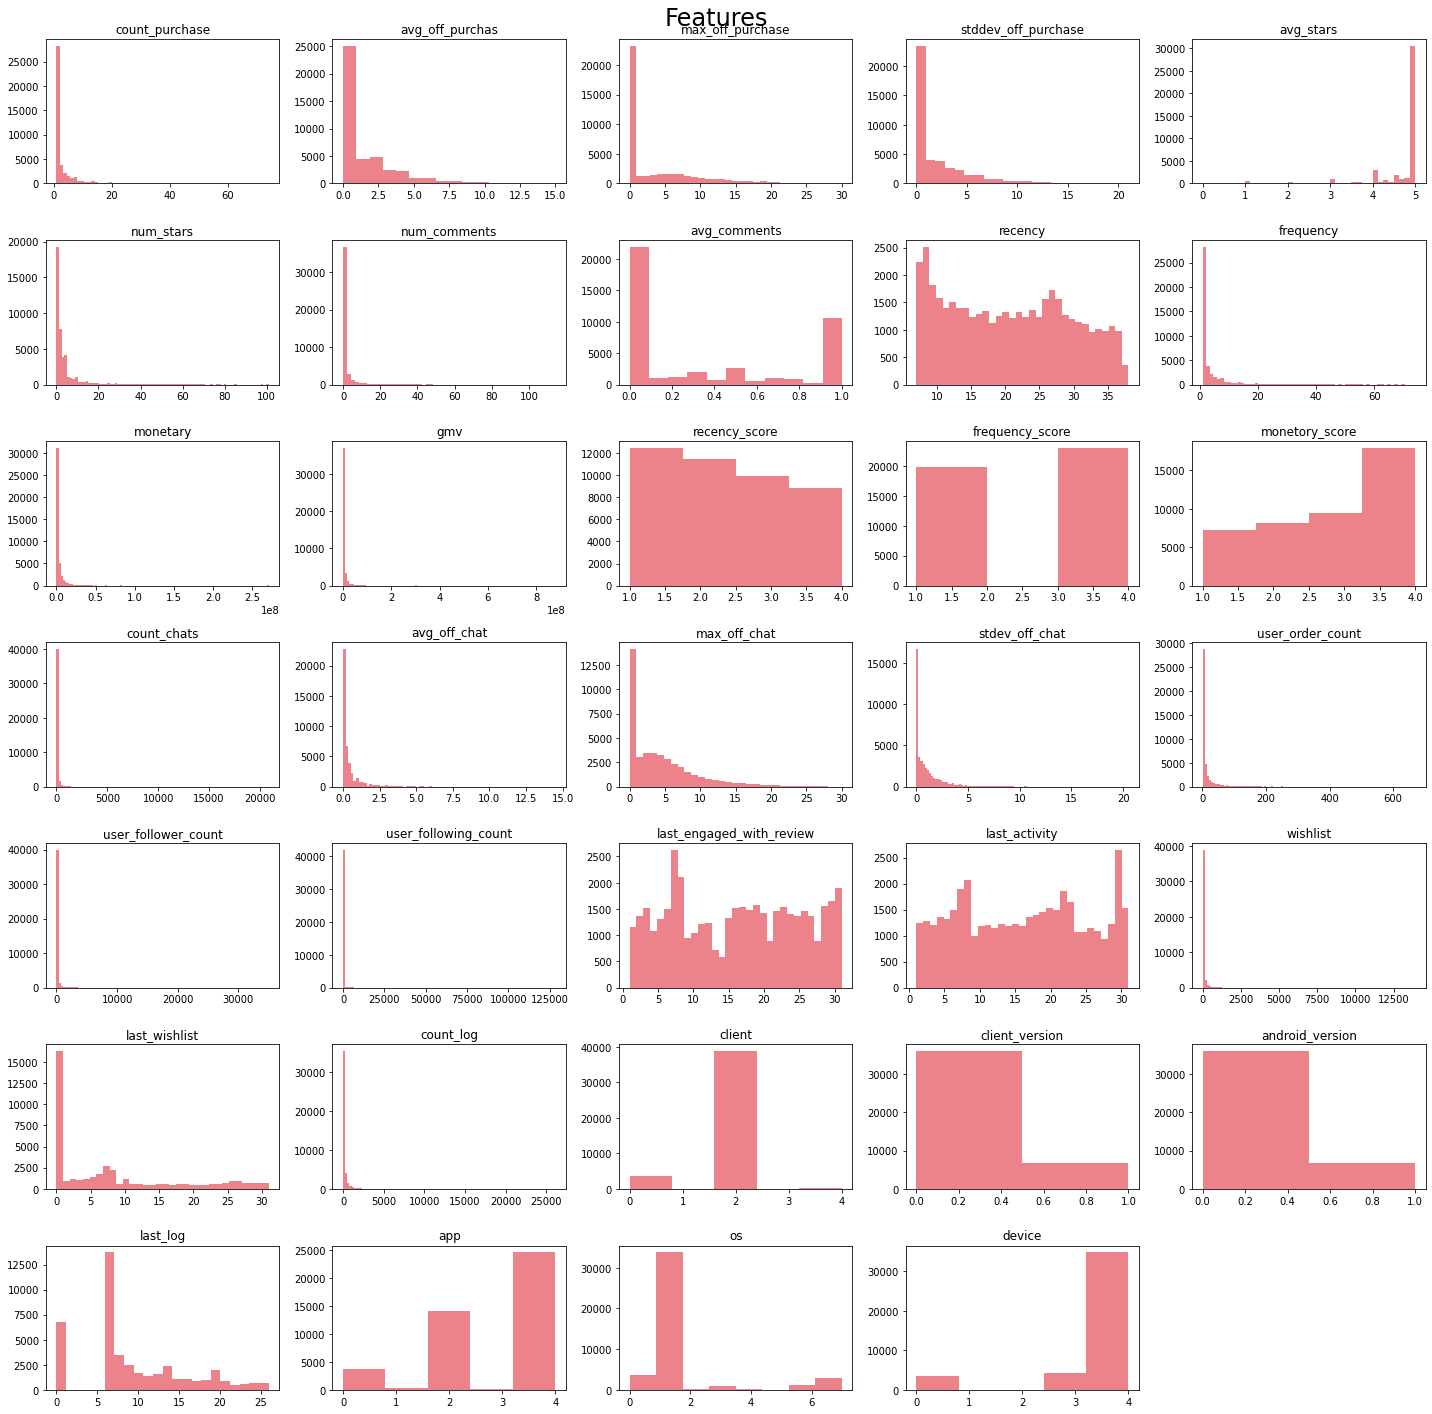

In [ ]:
# df = df.drop(columns=['creation_tags'])
df = train_x
fig = plt.figure(figsize=(20, 20))
plt.suptitle('Features',horizontalalignment="center", fontsize = 24)
for i in range(df.shape[1]):
    plt.subplot(7, 5, i + 1)
    f = plt.gca()
    f.set_title(df.columns.values[i])
    vals = np.size(df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(df.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout()
plt.savefig("features.png")

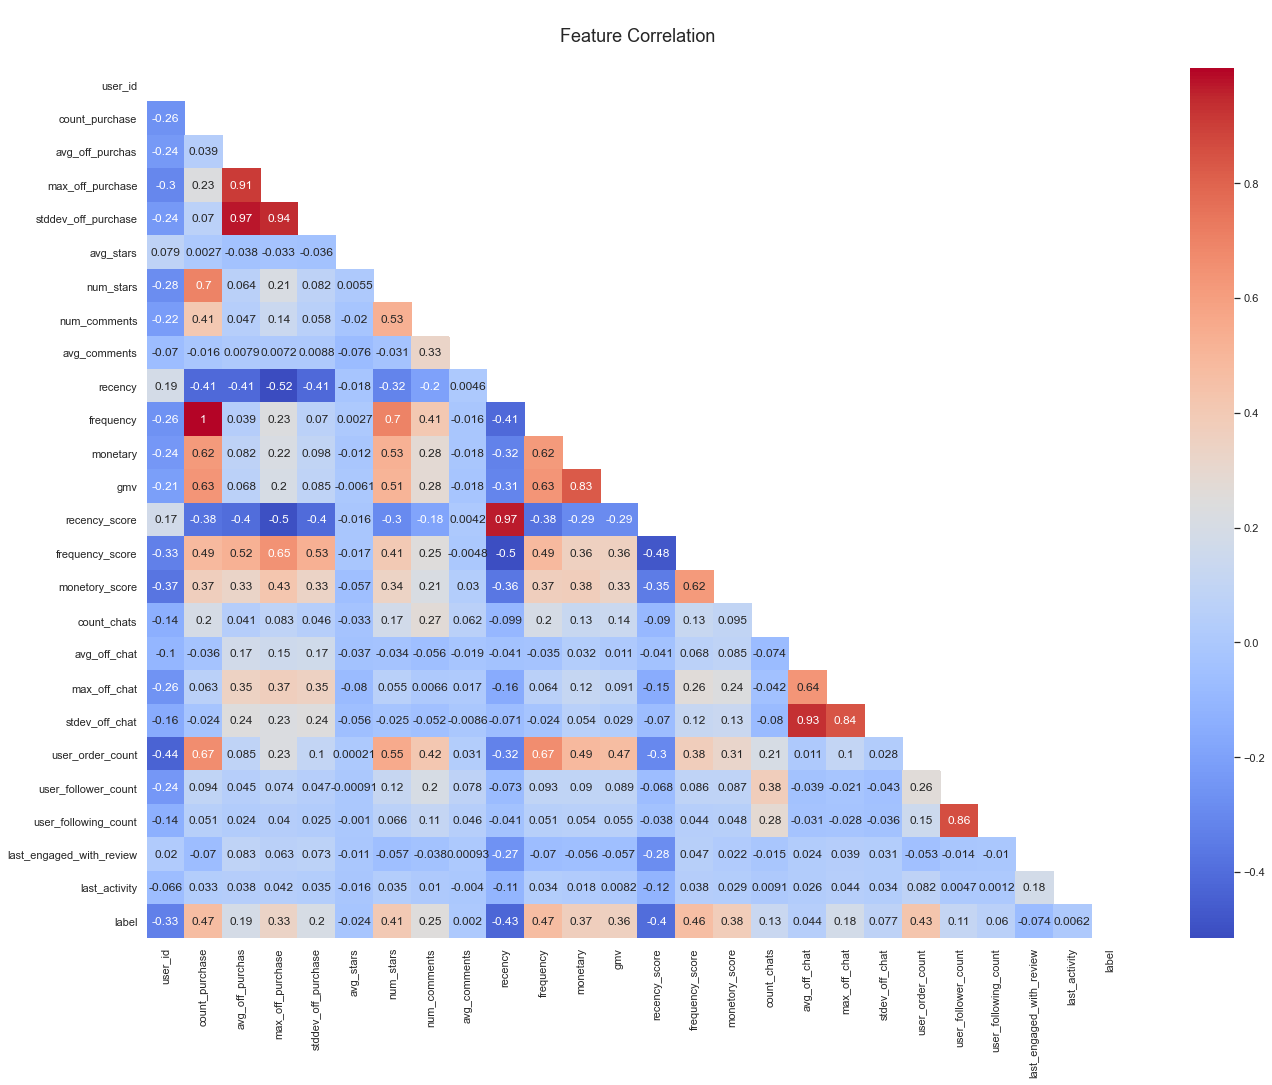

In [ ]:


def half_masked_corr_heatmap(X,title=None, file=None):
    plt.figure(figsize=(22,16))
    sns.set(font_scale=1)
    
    mask = np.zeros_like(X.corr())
    mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style('white'):
        sns.heatmap(X.corr(), mask = mask, annot =True, cmap='coolwarm')
        
    if title: plt.title(f'\n{title}\n',fontsize=18)
    plt.xlabel('')
    plt.ylabel('')
    if file: plt.savefig(file,bbox_inches='tight')
    plt.savefig("Feature_Correlation.png")
    plt.show()
    

half_masked_corr_heatmap(df,"Feature Correlation")

[0.06621631 0.01636638 0.03078902 0.01816422 0.01750705 0.03160846
 0.01576874 0.01495509 0.0615808  0.07410739 0.06917748 0.07519691
 0.02979896 0.04900664 0.00870405 0.04059408 0.02177749 0.0260886
 0.02869833 0.1016302  0.04138583 0.02981181 0.09056363 0.04050252]
('user_id', 0.06621631124129963)
('count_purchase', 0.0163663779256458)
('avg_off_purchas', 0.030789022829011387)
('max_off_purchase', 0.01816422246333486)
('stddev_off_purchase', 0.017507053015237233)
('avg_stars', 0.031608459908542975)
('num_stars', 0.015768737080695427)
('num_comments', 0.014955085944025994)
('avg_comments', 0.061580799913535635)
('recency', 0.07410739473250273)
('frequency', 0.06917747602762123)
('monetary', 0.07519691339947376)
('gmv', 0.029798956338123808)
('recency_score', 0.049006638516279025)
('frequency_score', 0.008704051697411518)
('monetory_score', 0.04059407775217396)
('count_chats', 0.021777492984286075)
('avg_off_chat', 0.026088598984257905)
('max_off_chat', 0.028698334068334854)
('stdev_of

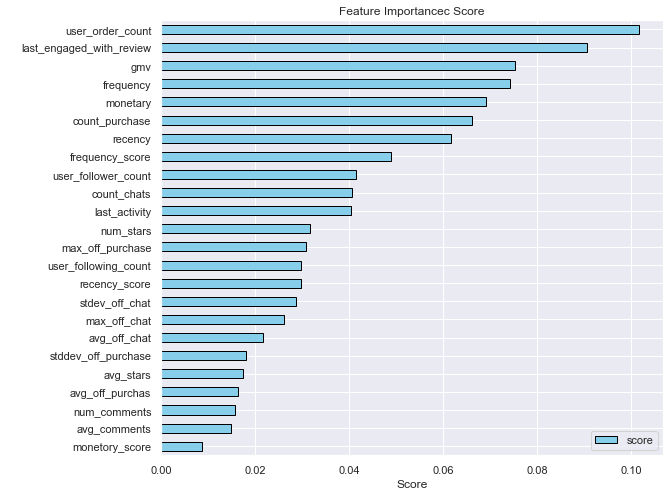

In [ ]:
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
print(model.feature_importances_)



# Print the name and the gini importance of each features
for features in zip(df.columns[:-1],model.feature_importances_):
    print(features)
# Horizontal bar chart for feature Importance
feature_imp = pd.DataFrame({'feature':list(x.columns),'score':model.feature_importances_})
feature_imp.sort_values('score').plot(x='feature',y='score',kind='barh',color='skyblue',edgecolor='black',figsize=(9,8))

#plot formatting
plt.xlabel('Score')
plt.xticks()
plt.yticks()
plt.ylabel(' ')
plt.title('Feature Importancec Score')
plt.legend(loc="lower right")
plt.savefig('Feature Importancec Score.png')
plt.show()


In [ ]:
model

RandomForestClassifier(random_state=1)